# Descriptive Statistics - Week 4 Lecture

In [5]:
using Distributions
using StatsBase
using CSV
using DataFrames
using HypothesisTests
using Plots
using GLM
using StatsPlots
pyplot()

Plots.PyPlotBackend()

In [6]:
age = rand(18:80, 100) # Uniform distribution
wcc = round.(rand(Distributions.Normal(12, 2), 100), digits=1) # Normal distribution & round to one decimal place
crp = round.(Int, rand(Distributions.Chisq(4), 100)) .* 10 # chi squared distributiion with broadcasting & alternate round()
treatment = rand(["A", "B"], 100) # Uniformaly weighted
result = rand(["Improved", "Static", "Worse"], 100) # Uniformaly weighted

100-element Vector{String}:
 "Worse"
 "Static"
 "Worse"
 "Improved"
 "Worse"
 "Static"
 "Worse"
 "Static"
 "Worse"
 "Improved"
 ⋮
 "Worse"
 "Improved"
 "Worse"
 "Improved"
 "Improved"
 "Improved"
 "Improved"
 "Worse"
 "Static"

In [7]:
# Mean of the age variable
mean(age)

42.49

In [8]:
# Median of the age variable
median(age)

40.0

In [9]:
# Standard deviation of age
std(age)

18.46837044979083

In [10]:
# Variance of age
var(age)

341.08070707070704

In [11]:
# Mean of wcc
mean(wcc)

12.248

In [12]:
## Standard deviation of wcc
std(wcc)

2.250049606636092

In [13]:
# Descriptie statistics of the age variable
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           42.490000
Minimum:        18.000000
1st Quartile:   27.000000
Median:         40.000000
3rd Quartile:   54.250000
Maximum:        80.000000
Type:           Int64


In [14]:
# The summarystats() function omits the length and type
StatsBase.summarystats(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           12.248000
Minimum:        5.600000
1st Quartile:   10.650000
Median:         12.300000
3rd Quartile:   13.825000
Maximum:        16.900000


# Creating a dataframe

In [15]:
data = DataFrame(Age = age, WCC = wcc, CRP = crp, Treatment = treatment, Result = result)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,68,13.8,10,A,Worse
2,60,7.7,10,A,Static
3,54,12.2,10,B,Worse
4,28,9.8,20,B,Improved
5,25,14.0,50,A,Worse
6,31,10.5,40,B,Static
7,80,14.5,10,B,Worse
8,31,11.4,10,B,Static
9,44,6.7,10,B,Worse


In [16]:
# Number of rows and columns
size(data)

(100, 5)

In [17]:
# First six rows
first(data, 6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,68,13.8,10,A,Worse
2,60,7.7,10,A,Static
3,54,12.2,10,B,Worse
4,28,9.8,20,B,Improved
5,25,14.0,50,A,Worse
6,31,10.5,40,B,Static


In [18]:
# We can create dataframe objects by selecting only subjects according to their data point values for a particular variable
dataA = data[data[!,:Treatment] .== "A", :] # Only patient in treatment group A; note that .== uses punctation to perform function element-wise comparision
dataB = data[data[!,:Treatment] .== "B", :] # Only patient in treatment group B

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,54,12.2,10,B,Worse
2,28,9.8,20,B,Improved
3,31,10.5,40,B,Static
4,80,14.5,10,B,Worse
5,31,11.4,10,B,Static
6,44,6.7,10,B,Worse
7,72,11.2,20,B,Static
8,19,12.9,30,B,Improved
9,31,9.1,70,B,Worse


In [19]:
first(dataA)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,68,13.8,10,A,Worse


In [20]:
first(dataB)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,54,12.2,10,B,Worse


In [21]:
last(dataA)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
57,57,13.0,70,A,Improved


In [22]:
last(dataB)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
43,34,12.0,40,B,Static


In [23]:
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Age,42.49,18,40.0,80,0,Int64
2,WCC,12.248,5.6,12.3,16.9,0,Float64
3,CRP,38.7,0,30.0,130,0,Int64
4,Treatment,,A,,B,0,String
5,Result,,Improved,,Worse,0,String


# Visualizing the data
The Plots package works well with the DataFrames package by allowing macro function from the latter. In the code cell below, we look at the age distribution of the two treatment groups.

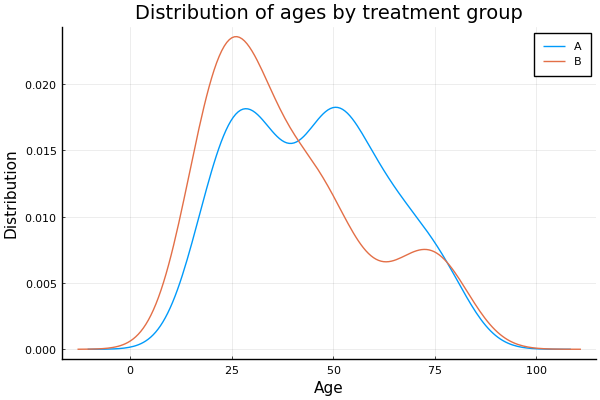

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/pgrepds/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [24]:
@df data density(:Age, group = :Treatment, title = "Distribution of ages by treatment group", xlab = "Age", ylab="Distribution", legend=:topright)

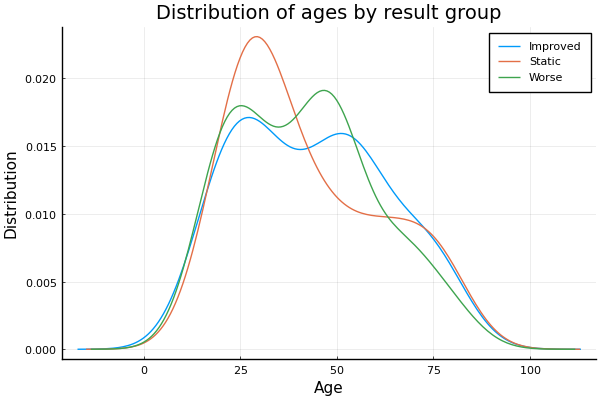

In [25]:
@df data density(:Age, group =  :Result, title = "Distribution of ages by result group", xlab = "Age", ylab="Distribution", legend = :topright)

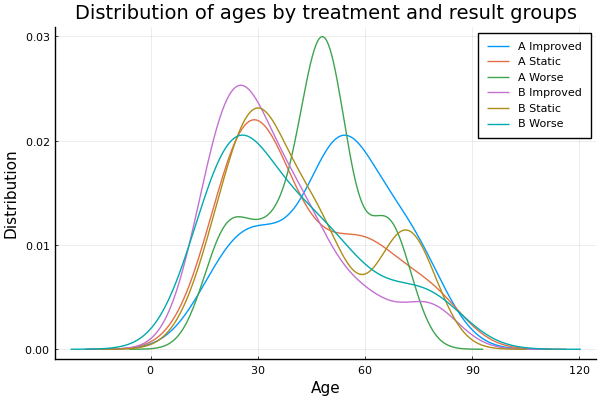

In [31]:
@df data density(:Age, group = (:Treatment, :Result), title="Distribution of ages by treatment and result groups", 
xlab="Age", ylab="Distribution", legend=:topright)

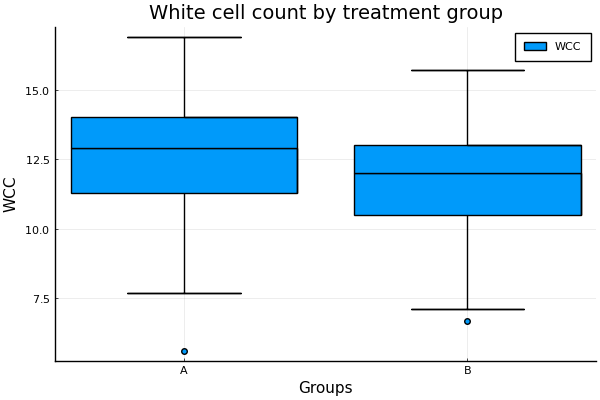

In [32]:
@df data boxplot(:Treatment, :WCC, lab="WCC", title="White cell count by treatment group", xlab="Groups", ylab="WCC")

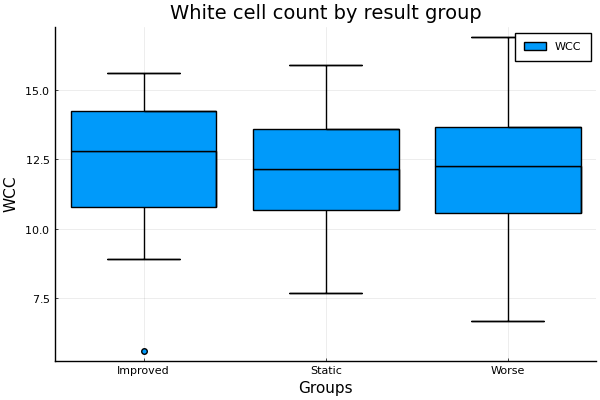

In [33]:
@df data boxplot(:Result, :WCC, lab="WCC", title="White cell count by result group", xlab="Groups", ylab="WCC")

In [34]:
@df data corrplot([:Age :WCC :CRP], grid=false)

In [35]:
@df data corrplot([:Age :WCC :CRP], grid=false, compact=true)

In [38]:
HypothesisTests.EqualVarianceTTest(dataA[!,:Age], dataB[!,:Age])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          5.91881
    95% confidence interval: (-1.427, 13.26)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1130

Details:
    number of observations:   [57,43]
    t-statistic:              1.59906438208637
    degrees of freedom:       98
    empirical standard error: 3.701419852656759


In [39]:
pvalue(EqualVarianceTTest(dataA[!, :WCC], dataB[!, :WCC]))

0.29325183683778483

In [41]:
UnequalVarianceTTest(dataA[!, :CRP], dataB[!, :CRP])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          5.06324
    95% confidence interval: (-5.126, 15.25)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3265

Details:
    number of observations:   [57,43]
    t-statistic:              0.9862498111479794
    degrees of freedom:       97.26561598452602
    empirical standard error: 5.133830634847486


In [44]:
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CRP ~ 1

Coefficients:
─────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────
(Intercept)   38.7     2.61176  14.82    <1e-26    33.5177    43.8823
─────────────────────────────────────────────────────────────────────

In [45]:
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CRP ~ 1 + Age

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  49.4163      6.50716    7.59    <1e-10  36.5031    62.3296
Age          -0.252208    0.140564  -1.79    0.0759  -0.531152   0.0267365
──────────────────────────────────────────────────────────────────────────

In [46]:
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CRP ~ 1 + Age + WCC

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  64.1029     16.3417     3.92    0.0002  31.6691    96.5366
Age          -0.269409    0.141684  -1.90    0.0602  -0.550613   0.0117956
WCC          -1.13943     1.16294   -0.98    0.3296  -3.44755    1.16869
──────────────────────────────────────────────────────────────────────────

In [47]:
CSV.write("data/ProjectData_1_point_0.csv", data)

"data/ProjectData_1_point_0.csv"

In [50]:
dataframe = CSV.read("data/ProjectData_1_point_0.csv", DataFrame)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String1,String15
1,68,13.8,10,A,Worse
2,60,7.7,10,A,Static
3,54,12.2,10,B,Worse
4,28,9.8,20,B,Improved
5,25,14.0,50,A,Worse
6,31,10.5,40,B,Static
7,80,14.5,10,B,Worse
8,31,11.4,10,B,Static
9,44,6.7,10,B,Worse


In [51]:
DataFrame(Group=rand(["A", "B"], 20), Variable1=randn(20), Variable2=rand(20))

,Group,Variable1,Variable2
,String,Float64,Float64
1,B,0.872061,0.545648
2,B,-1.05587,0.774563
3,A,1.0792,0.92286
4,A,0.651998,0.00386619
5,A,0.598864,0.124668
6,B,0.341724,0.514616
7,B,-0.416387,0.179308
8,A,0.904758,0.588364
9,B,-0.735072,0.196626


In [59]:
view(dataframe, 1:3, :)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String1,String15
1,28,9.8,20,B,Improved
2,25,14.0,50,A,Worse
3,31,10.5,40,B,Static


In [58]:
delete!(dataframe,[1,2,3])

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String1,String15
1,28,9.8,20,B,Improved
2,25,14.0,50,A,Worse
3,31,10.5,40,B,Static
4,80,14.5,10,B,Worse
5,31,11.4,10,B,Static
6,44,6.7,10,B,Worse
7,65,11.8,10,A,Improved
8,75,11.3,20,A,Static
9,72,11.2,20,B,Static


In [ ]:
view(df, 1:3, :)
delete!(df,[3,5,9])



In [73]:
var(rand(Normal(80, 10), 200))

103.8988053126307